# **Shallow Network with visual aids**

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [32]:
# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Data Cleaning and Preprocessing
# Reshape images to 28x28 if not already
if x_train.shape[1:] != (28, 28):
    x_train = x_train.reshape((-1, 28, 28))
if x_test.shape[1:] != (28, 28):
    x_test = x_test.reshape((-1, 28, 28))

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [33]:
# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [34]:

# Build the shallow neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the input image to 1D array
    Dense(128, activation='relu'),  # Fully connected layer with 128 neurons
    Dense(10, activation='softmax') # Output layer with 10 neurons (classes)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

print('Training accuracy:', history.history['accuracy'][-1])

# Validation accuracy
print('Validation accuracy:', history.history['val_accuracy'][-1])


Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5012 - accuracy: 0.8228 - val_loss: 0.4605 - val_accuracy: 0.8341
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3751 - accuracy: 0.8652 - val_loss: 0.3934 - val_accuracy: 0.8590
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3372 - accuracy: 0.8779 - val_loss: 0.3855 - val_accuracy: 0.8601
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3149 - accuracy: 0.8853 - val_loss: 0.3670 - val_accuracy: 0.8690
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2933 - accuracy: 0.8929 - val_loss: 0.3616 - val_accuracy: 0.8692
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2797 - accuracy: 0.8975 - val_loss: 0.3906 - val_accuracy: 0.8632
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2676 - accuracy: 0.9010 - val_loss: 0.3538 - val_accuracy:

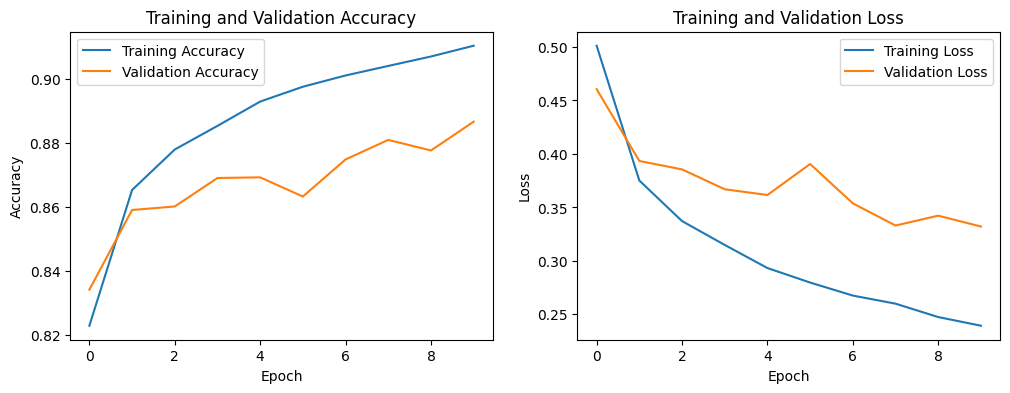

In [36]:
# Plot training history (accuracy and loss)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [37]:
# Make predictions
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)


313/313 [==============================] - 0s 1ms/step


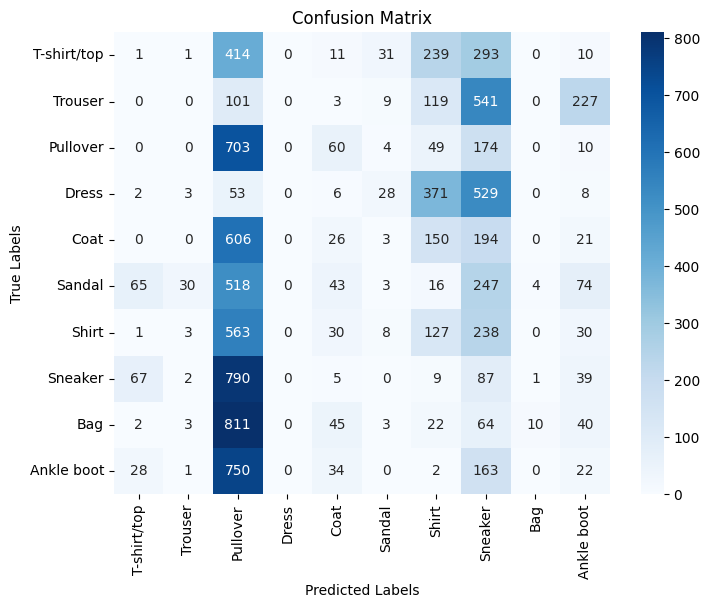

In [38]:
# Confusion Matrix
cm = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

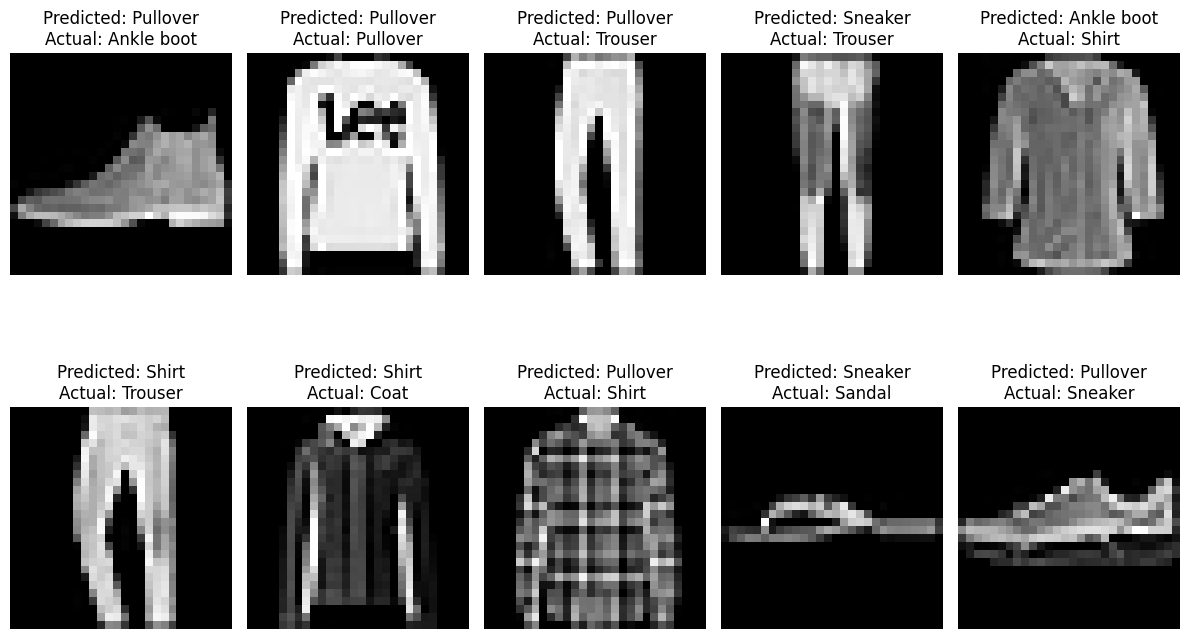

In [39]:
# Display sample predictions
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title("Predicted: {}\nActual: {}".format(class_names[predicted_labels[i]], class_names[y_test[i]]))
    plt.axis('off')
plt.tight_layout()
plt.show()

# **Simple CNN**

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, Concatenate, BatchNormalization
from tensorflow.keras.utils import to_categorical

In [47]:
# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Data Cleaning and Preprocessing
# Reshape images to have a single channel (grayscale) and normalize the data
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255.0
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255.0

# Convert labels to one-hot encoded format
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [46]:
# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [45]:
# Build the Simple CNN model
simpleCNN = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
simpleCNN.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
simpleCNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [48]:
# Train the model
history1 = simpleCNN.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = simpleCNN.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

print('Training accuracy:', history1.history['accuracy'][-1])

# Validation accuracy
print('Validation accuracy:', history1.history['val_accuracy'][-1])

Epoch 1/5
938/938 [==============================] - 44s 46ms/step - loss: 0.4789 - accuracy: 0.8280 - val_loss: 0.3558 - val_accuracy: 0.8713
Epoch 2/5
938/938 [==============================] - 42s 45ms/step - loss: 0.3177 - accuracy: 0.8853 - val_loss: 0.3175 - val_accuracy: 0.8825
Epoch 3/5
938/938 [==============================] - 44s 47ms/step - loss: 0.2722 - accuracy: 0.9004 - val_loss: 0.2845 - val_accuracy: 0.8988
Epoch 4/5
938/938 [==============================] - 43s 46ms/step - loss: 0.2441 - accuracy: 0.9117 - val_loss: 0.2754 - val_accuracy: 0.9022
Epoch 5/5
938/938 [==============================] - 43s 46ms/step - loss: 0.2176 - accuracy: 0.9197 - val_loss: 0.2508 - val_accuracy: 0.9105
313/313 - 2s - loss: 0.2508 - accuracy: 0.9105 - 2s/epoch - 6ms/step

Test accuracy: 0.9104999899864197

Test loss: 0.2508262097835541
Training accuracy: 0.9196833372116089
Validation accuracy: 0.9104999899864197


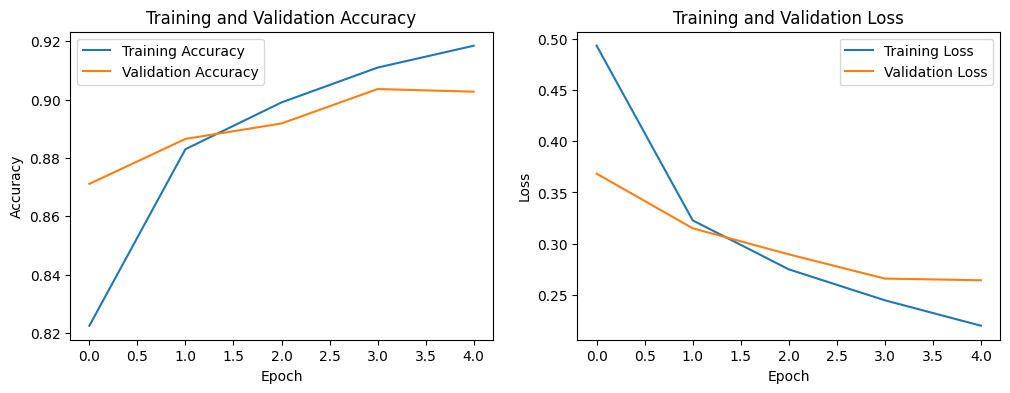

In [26]:
# Plot training history (accuracy and loss)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [49]:
# Make predictions
predictions = simpleCNN.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

313/313 [==============================] - 2s 7ms/step


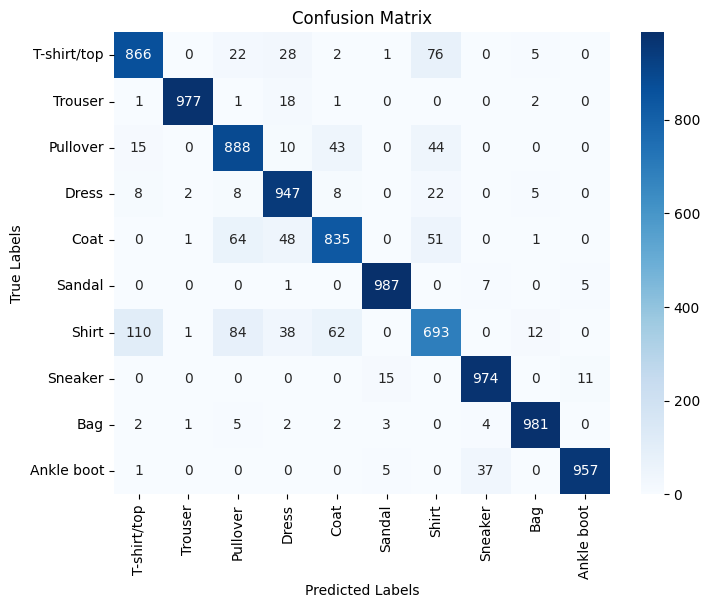

In [50]:

# Confusion Matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

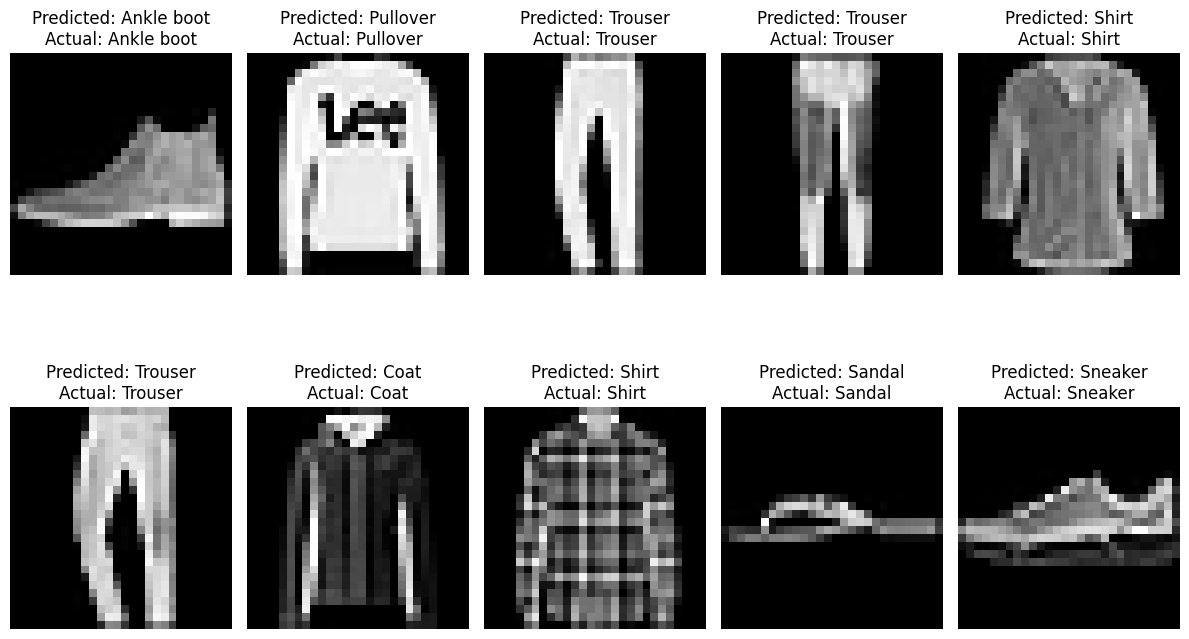

In [51]:
# Display sample predictions
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Predicted: {}\nActual: {}".format(class_names[predicted_labels[i]], class_names[np.argmax(y_test[i])]))
    plt.axis('off')
plt.tight_layout()
plt.show()

# **Deep CNN**

In [52]:
# Define the model
deepCNN = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
deepCNN.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [53]:
deepCNN.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 1, 1, 128)        

In [54]:
# Train the model
history2 = deepCNN.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = deepCNN.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)
print('Training accuracy:', history2.history['accuracy'][-1])
# Validation accuracy
print('Validation accuracy:', history2.history['val_accuracy'][-1])

Epoch 1/5
938/938 [==============================] - 53s 55ms/step - loss: 0.7546 - accuracy: 0.7232 - val_loss: 0.5023 - val_accuracy: 0.8127
Epoch 2/5
938/938 [==============================] - 52s 55ms/step - loss: 0.4778 - accuracy: 0.8303 - val_loss: 0.4199 - val_accuracy: 0.8473
Epoch 3/5
938/938 [==============================] - 48s 52ms/step - loss: 0.3995 - accuracy: 0.8584 - val_loss: 0.3593 - val_accuracy: 0.8657
Epoch 4/5
938/938 [==============================] - 48s 51ms/step - loss: 0.3564 - accuracy: 0.8741 - val_loss: 0.3370 - val_accuracy: 0.8784
Epoch 5/5
938/938 [==============================] - 48s 51ms/step - loss: 0.3277 - accuracy: 0.8830 - val_loss: 0.3200 - val_accuracy: 0.8827
313/313 - 2s - loss: 0.3200 - accuracy: 0.8827 - 2s/epoch - 7ms/step

Test accuracy: 0.8827000260353088

Test loss: 0.3200458884239197
Training accuracy: 0.8829833269119263
Validation accuracy: 0.8827000260353088


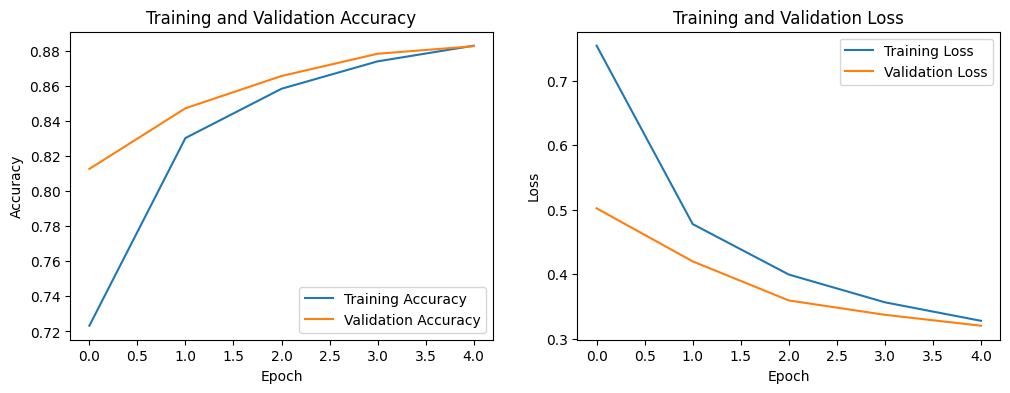

In [55]:
# Plot training history (accuracy and loss)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [56]:
# Make predictions
predictions = deepCNN.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

313/313 [==============================] - 2s 8ms/step


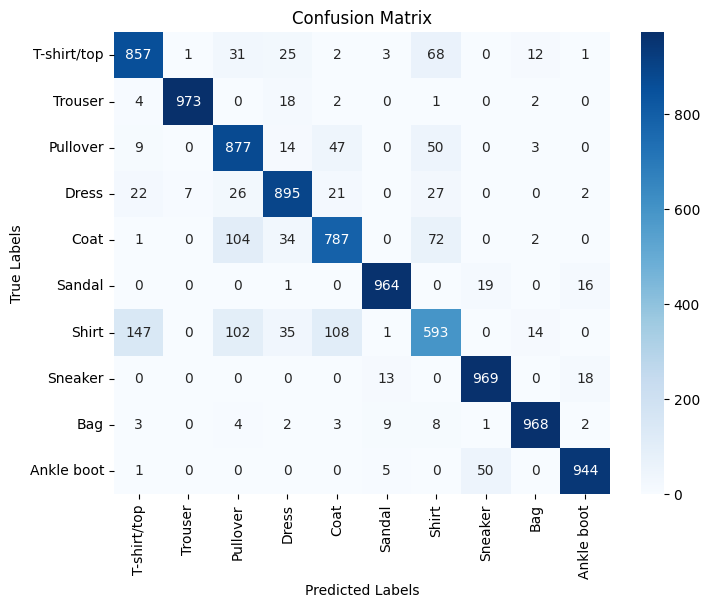

In [57]:

# Confusion Matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

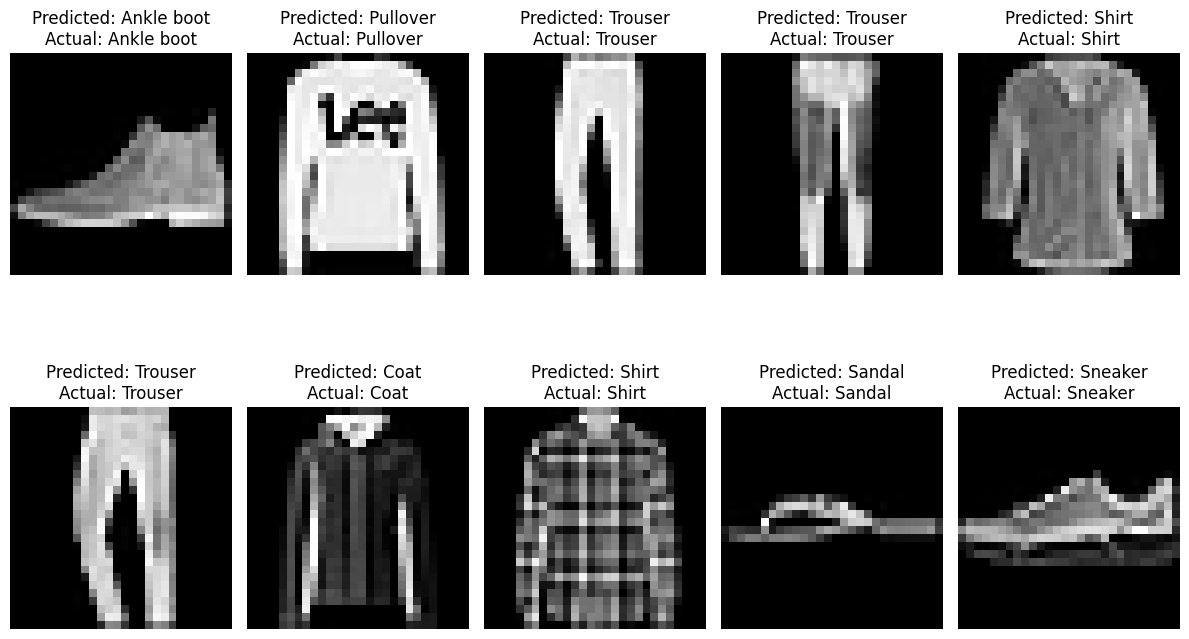

In [58]:
# Display sample predictions
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Predicted: {}\nActual: {}".format(class_names[predicted_labels[i]], class_names[np.argmax(y_test[i])]))
    plt.axis('off')
plt.tight_layout()
plt.show()

In [32]:
from sklearn.metrics import classification_report

# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Shallow Network model evaluation
predictions_shallow = np.argmax(model.predict(x_test), axis=1)
print("Shallow Network Classification Report:")
print(classification_report(np.argmax(y_test, axis=1), predictions_shallow, target_names=class_names))

# Simple CNN model evaluation
predictions_cnn = np.argmax(simpleCNN.predict(x_test), axis=1)
print("\nSimple CNN Classification Report:")
print(classification_report(np.argmax(y_test, axis=1), predictions_cnn, target_names=class_names))

# Deep CNN model evaluation
predictions_deep_cnn = np.argmax(deepCNN.predict(x_test), axis=1)
print("\nDeep CNN Classification Report:")
print(classification_report(np.argmax(y_test, axis=1), predictions_deep_cnn, target_names=class_names))

# Additional Layers model evaluation



313/313 [==============================] - 1s 3ms/step
Shallow Network Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.80      0.89      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.80      0.81      0.80      1000
       Dress       0.88      0.90      0.89      1000
        Coat       0.75      0.88      0.81      1000
      Sandal       0.95      0.97      0.96      1000
       Shirt       0.82      0.58      0.68      1000
     Sneaker       0.97      0.90      0.94      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.93      0.97      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.88     10000
weighted avg       0.89      0.89      0.88     10000

313/313 [==============================] - 1s 3ms/step

Simple CNN Classification Report:
              precision    recall  f1-score   support

 T

# **Extra Task**

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, Concatenate, BatchNormalization
from tensorflow.keras.utils import to_categorical

In [67]:
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data to fit the model
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [68]:
# Define the model
input_layer = Input(shape=x_train.shape[1:])
hidden1 = Dense(30, activation="relu")(input_layer)
hidden2 = Dense(30, activation="relu")(hidden1)
concat = Concatenate()([input_layer, hidden2])
batch_norm = BatchNormalization()(concat)
dropout = Dropout(0.5)(batch_norm)
flatten = Flatten()(dropout)
output = Dense(10)(flatten)

# Combine input and output into a model
q2Model = Model(inputs=[input_layer], outputs=[output])

# Compile the model
q2Model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [69]:
q2Model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 dense (Dense)               (None, 28, 28, 30)           60        ['input_1[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 28, 28, 30)           930       ['dense[0][0]']               
                                                                                                  
 concatenate (Concatenate)   (None, 28, 28, 31)           0         ['input_1[0][0]',             
                                                                     'dense_1[0][0]']         

In [70]:
print("Shapes of training and testing data:")
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


Shapes of training and testing data:
x_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)
x_test shape: (10000, 28, 28, 1)
y_test shape: (10000, 10)


In [72]:
historyq2 = q2Model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = q2Model.evaluate(x_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)
print('Training accuracy:', historyq2.history['accuracy'][-1])
# Validation accuracy
print('Validation accuracy:', historyq2.history['val_accuracy'][-1])


Epoch 1/5
1875/1875 [==============================] - 76s 41ms/step - loss: 9.6869 - accuracy: 0.3251 - val_loss: 10.9420 - val_accuracy: 0.2135
Epoch 2/5
1875/1875 [==============================] - 69s 37ms/step - loss: 11.4354 - accuracy: 0.1869 - val_loss: 11.9682 - val_accuracy: 0.2057
Epoch 3/5
1875/1875 [==============================] - 70s 37ms/step - loss: 10.9689 - accuracy: 0.2136 - val_loss: 10.2417 - val_accuracy: 0.2552
Epoch 4/5
1875/1875 [==============================] - 69s 37ms/step - loss: 10.3221 - accuracy: 0.1813 - val_loss: 10.4058 - val_accuracy: 0.2571
Epoch 5/5
1875/1875 [==============================] - 69s 37ms/step - loss: 9.9981 - accuracy: 0.2095 - val_loss: 10.5643 - val_accuracy: 0.2042
313/313 - 2s - loss: 10.5643 - accuracy: 0.2042 - 2s/epoch - 8ms/step

Test accuracy: 0.20419999957084656

Test loss: 10.564287185668945
Training accuracy: 0.20953333377838135
Validation accuracy: 0.20419999957084656


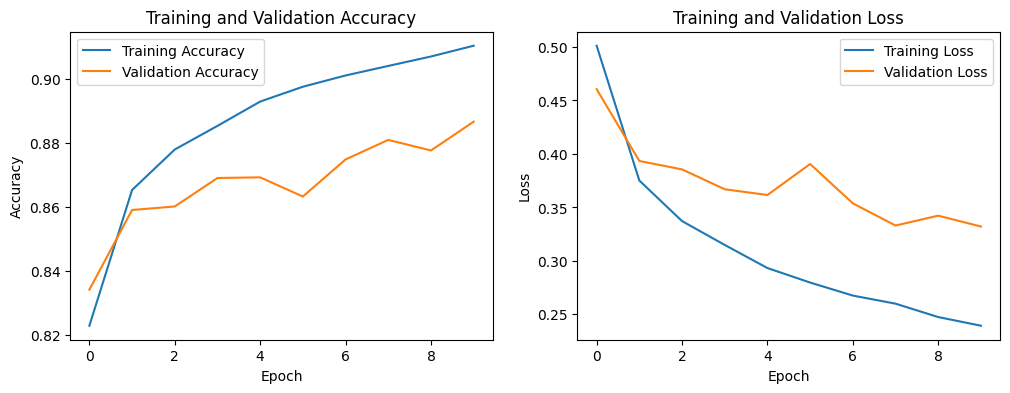

In [73]:
# Plot training history (accuracy and loss)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [74]:
# Make predictions
predictions = q2Model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

313/313 [==============================] - 3s 9ms/step


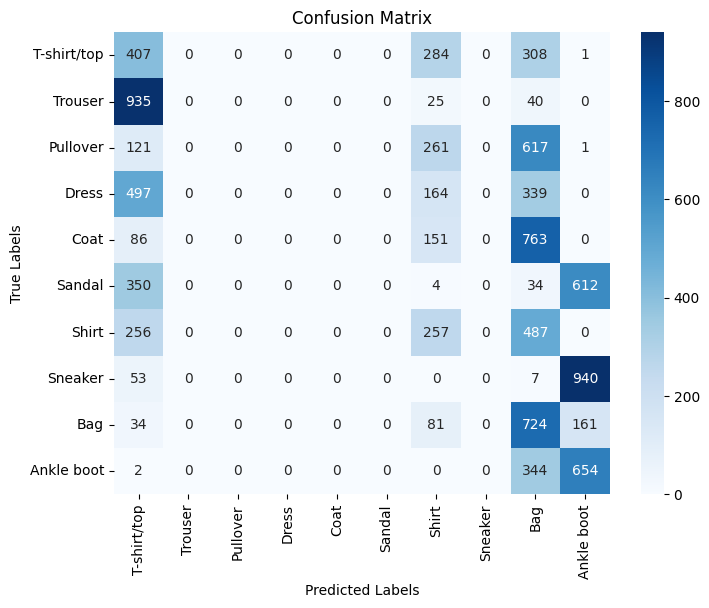

In [75]:

# Confusion Matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

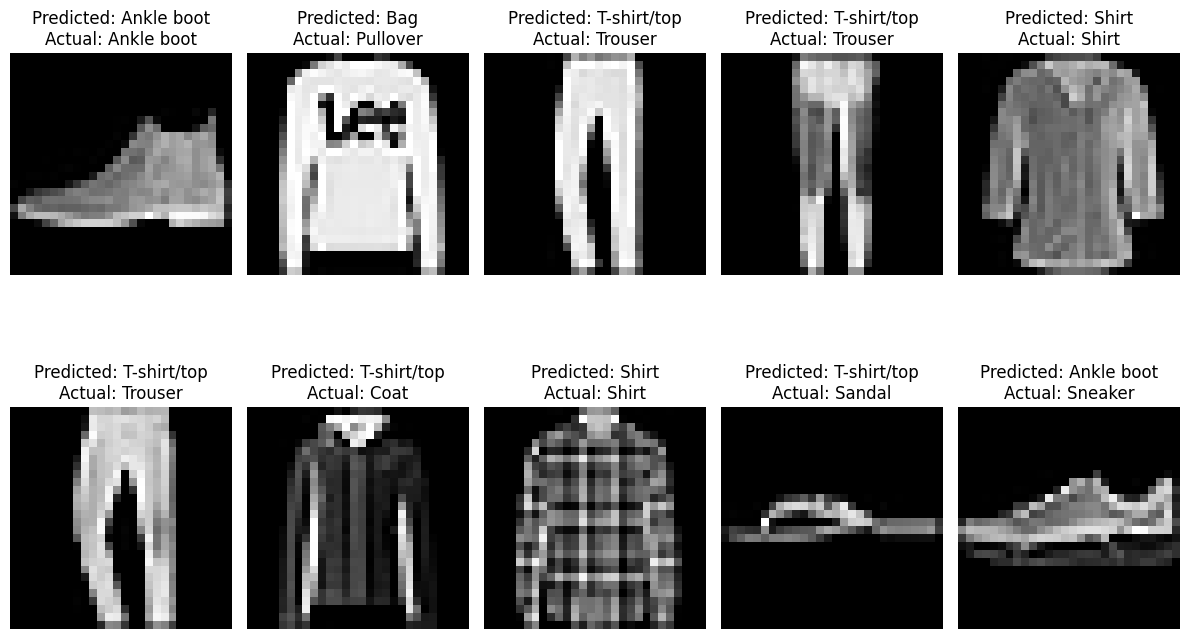

In [76]:
# Display sample predictions
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Predicted: {}\nActual: {}".format(class_names[predicted_labels[i]], class_names[np.argmax(y_test[i])]))
    plt.axis('off')
plt.tight_layout()
plt.show()

In [77]:
from sklearn.metrics import classification_report

# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Shallow Network model evaluation
predictions_shallow = np.argmax(model.predict(x_test), axis=1)
print("Shallow Network Classification Report:")
print(classification_report(np.argmax(y_test, axis=1), predictions_shallow, target_names=class_names))

# Simple CNN model evaluation
predictions_cnn = np.argmax(simpleCNN.predict(x_test), axis=1)
print("\nSimple CNN Classification Report:")
print(classification_report(np.argmax(y_test, axis=1), predictions_cnn, target_names=class_names))

# Deep CNN model evaluation
predictions_deep_cnn = np.argmax(deepCNN.predict(x_test), axis=1)
print("\nDeep CNN Classification Report:")
print(classification_report(np.argmax(y_test, axis=1), predictions_deep_cnn, target_names=class_names))

# Additional Layers model evaluation
predictions_q2Model = np.argmax(q2Model.predict(x_test), axis=1)
print("\nModel with Additional Layers Classification Report:")
print(classification_report(np.argmax(y_test, axis=1), predictions_q2Model, target_names=class_names))


313/313 [==============================] - 1s 1ms/step
Shallow Network Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.01      0.00      0.00      1000
     Trouser       0.00      0.00      0.00      1000
    Pullover       0.13      0.70      0.22      1000
       Dress       0.00      0.00      0.00      1000
        Coat       0.10      0.03      0.04      1000
      Sandal       0.03      0.00      0.01      1000
       Shirt       0.12      0.13      0.12      1000
     Sneaker       0.03      0.09      0.05      1000
         Bag       0.67      0.01      0.02      1000
  Ankle boot       0.05      0.02      0.03      1000

    accuracy                           0.10     10000
   macro avg       0.11      0.10      0.05     10000
weighted avg       0.11      0.10      0.05     10000

  9/313 [..............................] - ETA: 2s 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


313/313 [==============================] - 2s 7ms/step

Simple CNN Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.86      0.87      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.83      0.89      0.86      1000
       Dress       0.87      0.95      0.91      1000
        Coat       0.88      0.83      0.86      1000
      Sandal       0.98      0.99      0.98      1000
       Shirt       0.78      0.69      0.73      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

313/313 [==============================] - 3s 11ms/step

Deep CNN Classification Report:
              precision    recall  f1-score   support

 T-shir

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
